In [1]:
from pathlib import Path
from copy import deepcopy

import matplotlib.pyplot as plt
from nmr_to_pandas import nmr_to_pandas, calc_threshold, calc_contour_levels
from rich import print
from skimage.filters import threshold_otsu


Grab a qualitative colormap

In [2]:
colors = plt.cm.get_cmap("Set1")
colors = iter([colors(i) for i in range(20)])

In [3]:
# next(colors)

Read NMR data

In [4]:
data = nmr_to_pandas("test_pipe.ft2",pseudo_dim=0)
data.name = "Example 1"
save_path = Path("docs/static")
# calculate picking and plotting threshold
threshold = calc_threshold(data.df.groupby("Z").get_group(0).intensity)
print(f"[green]Threshold[/green] = {threshold:.3e}")
# detect all peaks with a threshold
# peaks = ng.peakpick.pick(data.data[0], pthres=threshold, algorithm="thres",msep=[1,1])

Skipping pseudo dimension:  0

Threshold = 1.278e+07

In [5]:
data.df.head()

,Z,Y,X,intensity,Y_PPM,X_PPM
0,0.0,0.0,0.0,-24273.875000,130.538386,10.498205
1,0.0,0.0,1.0,-33351.800781,130.538386,10.490872
2,0.0,0.0,2.0,-9466.987305,130.538386,10.483539
3,0.0,0.0,3.0,-1997.709473,130.538386,10.476206
4,0.0,0.0,4.0,10106.075195,130.538386,10.468873


Plot the first plane 

/home/j-brady/src/python/nmr_for_pandas/nmr_to_pandas.py:130: UserWarning: No contour levels were found within the data range.
  ax.contour(


18287317.51171875

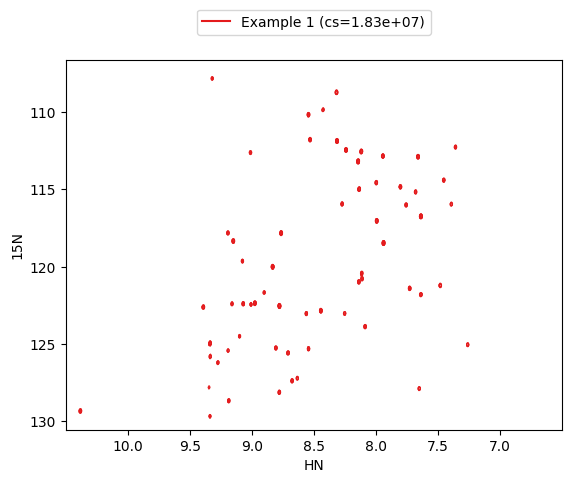

In [6]:
kwargs=dict(colors=[next(colors)], negative_contours=dict(colors="orange"))
# create figure
fig = plt.figure()
ax = fig.add_subplot(111)
ax = data.plot_contour(ax, query=f"Z==0", kwargs=kwargs, invert_axes=True, show_cs=True)
plt.savefig(save_path / "full_spectrum.png")
print(data.threshold)

In [7]:
data.threshold

18287317.51171875

10000000.0

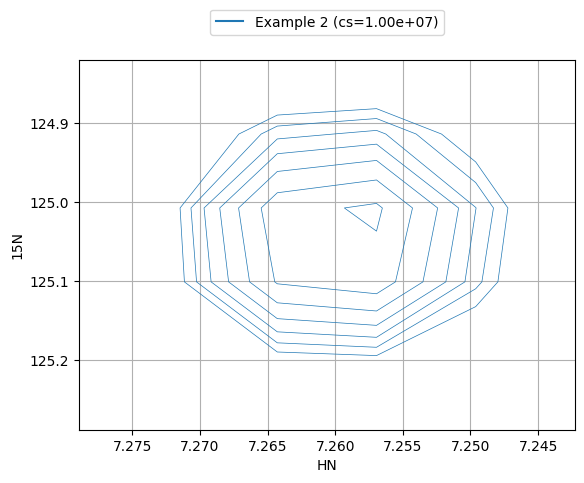

In [8]:
# kwargs = dict(nstd=2,colors=[next(colors)], negative_contours=dict(colors="red"))
kwargs = dict(colors=["tab:blue"], negative_contours=dict(colors="red"))
data.name = "Example 2"
# get first plane and slice data
query = "Z==1 & X_PPM > 7.24 & X_PPM < 7.28 & Y_PPM > 124.8 & Y_PPM < 125.3"
fig = plt.figure()
ax = fig.add_subplot(111)
ax = data.plot_contour(ax, query=query, kwargs=kwargs, threshold=1e7, show_cs=True, invert_axes=True)
plt.grid()
plt.savefig(save_path / "zoom.png")

print(data.threshold)

Overlays

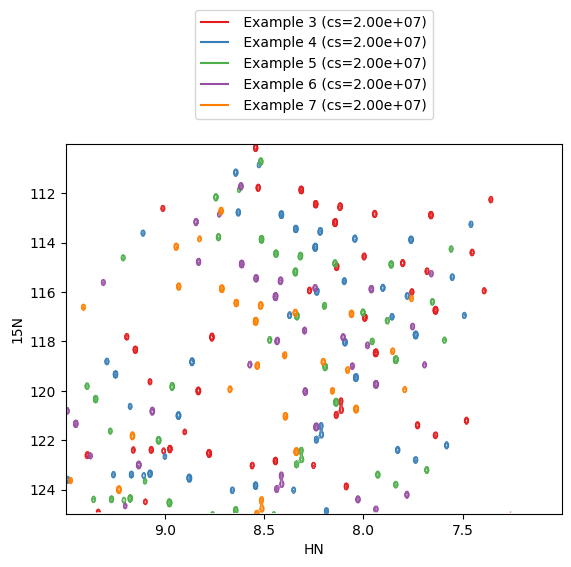

In [9]:
colors = plt.cm.get_cmap("Set1")
colors = iter([colors(i) for i in range(20)])
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(5):
    data.name = f" Example {i+3}"
    kwargs=dict(colors=[next(colors)], negative_contours=dict(colors="red"))
    ax = data.plot_contour(ax, query=f"Z==0 & X_PPM > 7 & X_PPM < 9.5 & Y_PPM > 110 & Y_PPM < 125", threshold=2e7, kwargs=kwargs, show_cs=True)
    data.df["Y_PPM"] = data.df.Y_PPM + 1.0
    data.df["X_PPM"] = data.df.X_PPM + 0.1
    
ax.invert_yaxis()
ax.invert_xaxis()
plt.savefig(save_path / "overlay.png", bbox_inches="tight")